## Introducción

Como analista de datos, tu objetivo es **evaluar cómo la movilidad urbana se relaciona con la productividad económica en las principales ciudades latinoamericanas**. 
Para ello trabajarás con datos reales de TomTom Traffic Index y OECD Cities, que deberás limpiar, combinar y analizar para identificar en qué ciudades conviene invertir en infraestructura de transporte.

## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de ambos datasets**.
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯Objetivo:**
Importar las librerías necesarias, cargar los archivos CSV en DataFrames y realizar una revisión preliminar para entender su contenido.

**Instrucciones:**
- Importa las librerías `pandas`, `numpy`, `seaborn` y `matplotlib.pyplot`.
- Carga los archivos usando `pd.read_csv()`:
  - `'/datasets/tomtom_traffic.csv'`
  - `/datasets/oecd_city_economy.csv` `.
- Guarda los DataFrames en las variables `traffic` y `eco`.
- Muestra las primeras 5 filas de cada DataFrame.


In [1]:
# importar librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# cargar archivos
traffic = pd.read_csv('/datasets/tomtom_traffic.csv')
eco = pd.read_csv('/datasets/oecd_city_economy.csv')

In [3]:
traffic.head(5)

,Country,City,UpdateTimeUTC,JamsDelay,TrafficIndexLive,JamsLengthInKms,JamsCount,TrafficIndexWeekAgo,UpdateTimeUTCWeekAgo,TravelTimeLivePer10KmsMins,TravelTimeHistoricPer10KmsMins,MinsDelay
0,ARE,abu-dhabi,2025-01-13 04:01:30.001,650.7,36.0,109.1,162.0,30.0,2025-01-06 04:01:30.000,11.614767,10.265330,1.349437
1,ARE,abu-dhabi,2025-01-13 03:46:00.000,540.4,30.0,101.4,136.0,27.0,2025-01-06 03:46:30.001,11.003180,10.031544,0.971635
2,ARE,abu-dhabi,2025-01-13 02:46:30.000,71.8,7.0,18.9,23.0,6.0,2025-01-06 02:46:30.000,8.196278,8.196510,-0.000232
3,ARE,abu-dhabi,2025-01-13 01:46:30.001,8.2,2.0,4.1,2.0,2.0,2025-01-06 01:46:30.000,7.723808,7.899046,-0.175238
4,ARE,abu-dhabi,2025-01-13 00:01:30.000,1.1,1.0,0.2,1.0,1.0,2025-01-06 00:01:30.000,8.336363,8.604379,-0.268016


In [4]:
eco.head(5)

,Year,City,Country,City GDP/capita,Unemployment %,PM2.5 (μg/m³),Population (M)
0,2023,buenos-aires,Argentina,"15.782,00",6.2%,"15,2","15,30"
1,2023,sao-paulo,Brazil,"14.475,00",9.1%,"29,50","22,50"
2,2023,rio-de-janeiro,Brazil,"13.142,00",9.8%,"19,10","13,60"
3,2023,brasilia,Brazil,"15.999,00",8.3%,"13,50","4,70"
4,2023,salvador,Brazil,"8.761,00",13.1%,"16,00","3,90"


**Tip:** Si no usas `print()` la tabla se vera mejor.


---

## 🧩Paso 2: Explorar, limpiar y preparar los datos

Antes de combinar los datasets, inspecciona su estructura, tipos de datos, columnas y valores faltantes.
Anota las columnas que necesiten limpieza y luego estandariza los nombres de columnas.

### 2.1 Explorar la estructura y tipos de datos

**🎯Objetivo:**
Identificar columnas con tipos incorrectos, distribución y nulos, anotar las columnas que requieren conversión.

**Instrucciones:**

- Usa `.info()` para conocer la estructura de ambos DataFrames.
- Muestra los primeros 3 renglones de cada DF.
- Identifica si los detalles de cada DF estan bien o si requieren correcciones y escribe tus conclusiones en el bloque Markdown.
  - ¿Hay columnas que requieren conversión?¿ Cuáles son? ¿Que tipo de dato ienen y cuál deberían de tener?
  - ¿Hay datos ausentes en alguna columna?


In [5]:
# Examinar la estructura de traffic
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004464 entries, 0 to 1004463
Data columns (total 12 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   Country                         1004464 non-null  object 
 1   City                            1004464 non-null  object 
 2   UpdateTimeUTC                   1004464 non-null  object 
 3   JamsDelay                       1004464 non-null  float64
 4   TrafficIndexLive                1004464 non-null  float64
 5   JamsLengthInKms                 1004464 non-null  float64
 6   JamsCount                       1004464 non-null  float64
 7   TrafficIndexWeekAgo             1004464 non-null  float64
 8   UpdateTimeUTCWeekAgo            1004464 non-null  object 
 9   TravelTimeLivePer10KmsMins      1004464 non-null  float64
 10  TravelTimeHistoricPer10KmsMins  1004464 non-null  float64
 11  MinsDelay                       1004464 non-null  float64
dtype

En la estructura del DF traffic, se observa que:
- Las columnas `UpdateTimeUTC` y `UpdateTimeUTC` son de tipo Object (texto).
- Hay que cambiarlas a datetime para que puedan ser tomadas como fecha y hora.

In [6]:
# Examinar la estructura de eco
eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             30 non-null     int64 
 1   City             30 non-null     object
 2   Country          30 non-null     object
 3   City GDP/capita  30 non-null     object
 4   Unemployment %   30 non-null     object
 5   PM2.5 (μg/m³)    30 non-null     object
 6   Population (M)   30 non-null     object
dtypes: int64(1), object(6)
memory usage: 1.8+ KB


En la estructura del DF eco, se observa que:
- Las columnas `City GDP/capita`, `Unemployment %`, PM2.5 (μg/m³) y Population (M), son de tipo object (texto.)
- Hay que cambiar las 4 a float (número decimal)

### 2.2 Renombrar columnas

**🎯Objetivo:**
Estandarizar los nombres de columnas para evitar errores y facilitar la unión de los datasets.

**Instrucciones:**

- Cambia los nombres de las columnas para que tengan el formato `snake_case`.
    - `Country` → `country`
    - `UpdateTimeUTC` → `update_time_utc`
- Verifica que los cambios se hayan aplicado correctamente usando `.columns`.


In [7]:
# Estandarizar los nombres de las columnas de traffic
#tu código aquí
traffic.columns = ['country', 'city', 'update_time_utc', 'jams_delay', 'traffic_index_live',
                            'jams_length_kms', 'jams_count', 'traffic_index_week_ago', 
                            'update_time_utc_week_ago', 'travel_time_live_per_10kms_mins', 
                            'travel_time_historic_per_10kms_mins', 'mins_delay'
                            ]
# verificar cambios
traffic.columns

Index(['country', 'city', 'update_time_utc', 'jams_delay',
       'traffic_index_live', 'jams_length_kms', 'jams_count',
       'traffic_index_week_ago', 'update_time_utc_week_ago',
       'travel_time_live_per_10kms_mins',
       'travel_time_historic_per_10kms_mins', 'mins_delay'],
      dtype='object')

In [8]:
# Estandarizar los nombres de las columnas de eco
#tu código aquí
eco.columns = ['year', 'city', 'country', 'city_gdp_capita', 'unemployment_pct', 'pm2.5', 'population_m']
# verificar cambios
eco.columns

Index(['year', 'city', 'country', 'city_gdp_capita', 'unemployment_pct',
       'pm2.5', 'population_m'],
      dtype='object')


### 2.3 Corregir formatos numéricos y de fecha

**🎯Objetivo:**
Asegurar que las columnas de fechas y valores numéricos estén en formatos correctos para permitir análisis, cálculos y comparaciones precisas.

**Instrucciones:**

- Convierte las columnas de fecha de `traffic` a formato `datetime`. Haz el cambio a prueba de errores.
- En el dataset `eco`, limpia los valores numéricos:
    - En `city_gdp_capita`: elimina separadores de miles (`.`) y reemplaza las comas (`','`) por puntos (`'.'`) antes de convertir a tipo `float`.
    - En `unemployment_pct`: elimina el símbolo de porcentaje (`%`) y reemplaza las comas (`','`) por puntos (`'.'`) antes de convertir a tipo `float`.
    - En `population_m`: reemplaza las comas (`','`) por puntos (`'.'`) antes de convertir a tipo `float`.
- Finalmente, crea una nueva columna llamada `population` multiplicando `population_m` por 1,000,000 para obtener la población total.


<details>
<summary>Haz clic para ver la pista</summary>
para eliminar símbolos, puedes reemplazarlos por un texto vacío.

In [9]:
# Convertir las columnas de traffic a tipo fecha con pd.to_datetime()
traffic['update_time_utc'] = pd.to_datetime(traffic['update_time_utc'], errors='coerce')
traffic['update_time_utc_week_ago'] = pd.to_datetime(traffic['update_time_utc_week_ago'], errors='coerce')

# verificar el cambio
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004464 entries, 0 to 1004463
Data columns (total 12 columns):
 #   Column                               Non-Null Count    Dtype         
---  ------                               --------------    -----         
 0   country                              1004464 non-null  object        
 1   city                                 1004464 non-null  object        
 2   update_time_utc                      1004464 non-null  datetime64[ns]
 3   jams_delay                           1004464 non-null  float64       
 4   traffic_index_live                   1004464 non-null  float64       
 5   jams_length_kms                      1004464 non-null  float64       
 6   jams_count                           1004464 non-null  float64       
 7   traffic_index_week_ago               1004464 non-null  float64       
 8   update_time_utc_week_ago             1004464 non-null  datetime64[ns]
 9   travel_time_live_per_10kms_mins      1004464 non-null  fl

In [10]:
# Limpia separadores y convierte columnas numéricas en eco
eco['city_gdp_capita'] = eco['city_gdp_capita'].astype(str).str.replace('.', '').str.replace(',', '.').astype(float)
eco['unemployment_pct'] = eco['unemployment_pct'].astype(str).str.replace('%', '').str.replace(',', '.').astype(float)
eco['population_m'] = eco['population_m'].astype(str).str.replace(',', '.').astype(float)
eco['pm2.5'] = eco['pm2.5'].astype(str).str.replace(',', '.').astype(float)

# Calcula la población total en unidades absolutas (Multiplica * 1000000)
eco['population'] = eco['population_m'] * 1000000

# verificar el cambio
eco.info()
eco.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              30 non-null     int64  
 1   city              30 non-null     object 
 2   country           30 non-null     object 
 3   city_gdp_capita   30 non-null     float64
 4   unemployment_pct  30 non-null     float64
 5   pm2.5             30 non-null     float64
 6   population_m      30 non-null     float64
 7   population        30 non-null     float64
dtypes: float64(5), int64(1), object(2)
memory usage: 2.0+ KB


,year,city,country,city_gdp_capita,unemployment_pct,pm2.5,population_m,population
0,2023,buenos-aires,Argentina,15782.0,6.2,15.2,15.3,15300000.0
1,2023,sao-paulo,Brazil,14475.0,9.1,29.5,22.5,22500000.0
2,2023,rio-de-janeiro,Brazil,13142.0,9.8,19.1,13.6,13600000.0


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

La conversión de fechas y la limpieza de variables numéricas muestran una comprensión clara de cómo preparar los datos para análisis. El uso de `to_datetime` con manejo de errores es una buena decisión para evitar fallos inesperados, y la normalización de separadores facilita trabajar con valores reales.


</div>


---

## 🧩Paso 3: Extraer año y filtrar

Extraer el año permite filtrar la información y trabajar solo con el período más reciente y relevante.

### 3.1 Extraer columna año y filtrar 2024

**🎯Objetivo**
Identificar el año de cada registro y mantener solo los registros del 2024.

**Intrucciones**

- Como el DataFrame `traffic` no tiene una columna de año, utiliza el atributo `.dt.year` sobre su columna de fecha para crear una nueva columna llamada `year`.
- Filtra las filas donde el año sea **2024**.
- Utiliza `.copy()` para crear dos nuevos DataFrames (`traffic_2024` y `eco_2024`) para evitar modificar el dataset original.

In [11]:
# Extraer el año de las fechas en update_time_utc
traffic['year'] = traffic['update_time_utc'].dt.year

# Verificar cambio
traffic.head(3)

,country,city,update_time_utc,jams_delay,traffic_index_live,jams_length_kms,jams_count,traffic_index_week_ago,update_time_utc_week_ago,travel_time_live_per_10kms_mins,travel_time_historic_per_10kms_mins,mins_delay,year
0,ARE,abu-dhabi,2025-01-13 04:01:30.001,650.7,36.0,109.1,162.0,30.0,2025-01-06 04:01:30.000,11.614767,10.265330,1.349437,2025
1,ARE,abu-dhabi,2025-01-13 03:46:00.000,540.4,30.0,101.4,136.0,27.0,2025-01-06 03:46:30.001,11.003180,10.031544,0.971635,2025
2,ARE,abu-dhabi,2025-01-13 02:46:30.000,71.8,7.0,18.9,23.0,6.0,2025-01-06 02:46:30.000,8.196278,8.196510,-0.000232,2025


In [12]:
# Filtra los registros del año 2024
traffic_2024 = traffic[traffic['year'] == 2024].copy()
eco_2024 = eco[eco['year'] == 2024].copy()

# Revisar dataframes nuevos
display(traffic_2024.head())
display(eco_2024.head())


,country,city,update_time_utc,jams_delay,traffic_index_live,jams_length_kms,jams_count,traffic_index_week_ago,update_time_utc_week_ago,travel_time_live_per_10kms_mins,travel_time_historic_per_10kms_mins,mins_delay,year
302,ARE,abu-dhabi,2024-12-31 23:01:30.000,12.9,5.0,2.5,5.0,2.0,2024-12-24 23:01:30.001,8.560399,8.519634,0.040765,2024
303,ARE,abu-dhabi,2024-12-31 22:01:30.000,136.0,21.0,20.6,32.0,3.0,2024-12-24 22:01:30.000,10.355732,9.049445,1.306286,2024
304,ARE,abu-dhabi,2024-12-31 21:16:30.000,455.2,31.0,40.4,72.0,4.0,2024-12-24 21:01:30.000,11.456878,9.305174,2.151704,2024
305,ARE,abu-dhabi,2024-12-31 20:01:00.001,399.4,27.0,38.0,75.0,6.0,2024-12-24 20:01:30.001,11.670062,9.952811,1.717252,2024
306,ARE,abu-dhabi,2024-12-31 19:46:00.000,366.4,28.0,39.8,82.0,9.0,2024-12-24 19:01:00.000,11.686322,10.008469,1.677853,2024


,year,city,country,city_gdp_capita,unemployment_pct,pm2.5,population_m,population
15,2024,buenos-aires,Argentina,18117.0,7.2,14.5,15.4,15400000.0
16,2024,sao-paulo,Brazil,14703.0,8.5,28.0,22.6,22600000.0
17,2024,rio-de-janeiro,Brazil,13349.0,9.2,18.4,13.7,13700000.0
18,2024,brasilia,Brazil,16251.0,7.8,12.8,4.8,4800000.0
19,2024,salvador,Brazil,8899.0,12.4,15.2,3.9,3900000.0


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Vas avanzando bien en esta etapa, ya que la extracción del año a partir de la fecha permite organizar y segmentar la información de forma clara. El filtrado por un año específico está correctamente planteado y el uso de copias evita efectos no deseados en los datos originales.

</div>


---

## 🧩Paso 4: Analizar y resumir datos de movilidad

Como el dataset de tráfico contiene **múltiples registros por ciudad**. En esta parte, calcularás los promedios anuales por ciudad para simplificar el análisis y obtener una visión más clara de las tendencias generales.

### 4.1 Calcular promedios de tráfico por ciudad

**🎯Objetivo:**
Obtener una vista consolidada del tráfico promedio por ciudad y año, para analizar patrones generales sin depender de datos diarios.

**Instrucciones**

- Agrupa los datos por `city`, `country` y `year`.
- Calcula el promedio **solo de las métricas de tráfico más relevantes**: como `jams_delay`, `traffic_index_live`, `jams_length_kms`, `jams_count`, `mins_delay`, y tiempos de viaje (`travel_time_live_per_10kms_mins` y `travel_time_hist_per_10kms_mins`).
- Guarda el resultado como `traffic_city_year_2024`, mantén las columnas como variables (no índices).


<details>
<summary>Haz clic para ver la pista</summary>
Usa ".agg()" para aplicar funciones de promedio. Al final, reinicia el índice para mantener las columnas de la agrupación como variables (no índices).

In [13]:
# Calcular los  promedios de trafico por ciudad, país y año
traffic_city_year_2024 =  traffic_2024.groupby(['city', 'country', 'year'], as_index=False).agg({
    'jams_delay': 'mean',
    'traffic_index_live': 'mean',
    'jams_length_kms': 'mean',
    'jams_count': 'mean',
    'mins_delay': 'mean',
    'travel_time_live_per_10kms_mins': 'mean',
    'travel_time_historic_per_10kms_mins': 'mean'
})

# Mostrar resultado
traffic_city_year_2024.head()

,city,country,year,jams_delay,traffic_index_live,jams_length_kms,jams_count,mins_delay,travel_time_live_per_10kms_mins,travel_time_historic_per_10kms_mins
0,a-coruna,ESP,2024,17.935187,15.259774,2.198002,4.934405,0.774172,16.267977,15.493804
1,aachen,DEU,2024,26.732141,20.960314,3.892586,6.601832,0.792968,13.397861,12.604894
2,aarhus,DNK,2024,21.200616,16.575891,2.736736,6.109987,0.495276,15.219292,14.724016
3,abu-dhabi,ARE,2024,171.157315,13.902028,24.507380,47.268019,0.139764,9.829092,9.689328
4,adana,TUR,2024,83.864761,22.541040,11.827331,23.754620,1.129749,15.879694,14.749945


### 🧠 **Momento de reflexión**

¡Excelente trabajo hasta aquí!

Ahora que ya tienes los promedios anuales por ciudad, es momento de **observarlos** con atención.

Piensa:

- ¿Cuál crees que tiene el mayor tiempo promedio de tráfico?
- ¿Será una ciudad de **Europa**, de **Latinoamérica** o de **otra región** del mundo?

Para descubrirlo, ejecuta esta línea de código:

`traffic_city_year_2024.sort_values(["jams_delay"], ascending=False)`


🔍 Observa qué ciudad aparece en los primeros lugares.

¿Te sorprenden los resultados? , ¿Coinciden con lo que imaginabas?

In [14]:
traffic_city_year_2024.sort_values(["jams_delay"], ascending=False)

,city,country,year,jams_delay,traffic_index_live,jams_length_kms,jams_count,mins_delay,travel_time_live_per_10kms_mins,travel_time_historic_per_10kms_mins
221,mexico-city,MEX,2024,2833.057892,34.218190,389.239265,594.969392,1.855542,21.809092,19.953550
352,tokyo,JPN,2024,2152.574357,36.805059,373.069734,518.809420,0.698152,22.443778,21.745626
246,new-york,USA,2024,2133.400000,28.210388,398.227892,544.474902,1.396351,18.505043,17.108691
200,london,GBR,2024,2050.703662,29.230166,287.632868,471.795554,1.325160,17.714139,16.388979
211,manila,PHL,2024,1741.493381,66.129402,246.858082,341.881205,2.469894,27.134629,24.664734
...,...,...,...,...,...,...,...,...,...,...
111,dunedin,NZL,2024,4.651175,15.430809,0.712315,1.591384,0.633294,16.226009,15.592715
363,uppsala,SWE,2024,4.194486,13.939168,0.656368,1.349672,0.501802,15.746717,15.244916
123,fujairah,ARE,2024,4.025959,10.907719,0.731910,1.373006,0.194951,11.662590,11.467639
12,almere,NLD,2024,3.633523,6.290478,0.506362,1.064063,-0.017544,9.467150,9.484694


La ciudad con el mayor tiempo promedio de tráfico es Ciudad de México en México.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Hector buen trabajo en esta parte del proceso, ya que el cálculo de promedios por ciudad, país y año está bien estructurado y responde directamente al objetivo del análisis. La selección de variables es coherente y el uso de `groupby` con agregaciones claras facilita interpretar los resultados. 

</div>


---

## 🧩Paso 5: Unir movilidad y economía

Combinar datasets te permite analizar cómo se relacionan los indicadores económicos con los de movilidad.

### 5.1 Unir tráfico (tabla principal) con indicadores económicos

**🎯Objetivo:**
Combinar la información de tráfico y economía en un solo DataFrame para analizar cómo las condiciones económicas se relacionan con la movilidad urbana.

**Instrucciones**
- Selecciona solo las **columnas relevantes** de cada dataset (por ejemplo, variables clave de tráfico y de economía).
- Usa `.copy()` al crear subconjuntos para evitar modificar el dataset original.
- Une ambos DataFrames y define como **claves de unión** a `city` y `year`.
- Mantén solo las ciudades y años presentes en ambos datasets.
- Guarda el resultado en una nueva variable llamada `merged` y muestra las primeras 5 filas.


<details>
<summary>Haz clic para ver la pista</summary>
Aplica una unión de tipo "inner" para mantener las ciudades y años presentes en ambos datasets.

In [15]:
# Seleccionar columnas clave de tráfico y economía
left_cols = ['city','country','year','jams_delay','traffic_index_live',
             'jams_length_kms','jams_count','mins_delay',
             'travel_time_live_per_10kms_mins','travel_time_hist_per_10kms_mins']

right_cols = ['city','year','city_gdp_capita','unemployment_pct','pm25','population']

# Usar .copy() para crear los dos nuevos datasets reducidos
traffic_2024_small = traffic_city_year_2024[['city', 'country', 'year', 'jams_delay', 'mins_delay', 'jams_count',
                                             'traffic_index_live', 'travel_time_live_per_10kms_mins']].copy()
eco_2024_small = eco_2024[['city', 'year', 'city_gdp_capita', 'unemployment_pct', 'population']].copy()

# Unir datasets
merged = pd.merge(traffic_2024_small, eco_2024_small, on=['city', 'year'], how='inner')
# Mostrar las primeras 5 filas
merged.head(5)

,city,country,year,jams_delay,mins_delay,jams_count,traffic_index_live,travel_time_live_per_10kms_mins,city_gdp_capita,unemployment_pct,population
0,belo-horizonte,BRA,2024,263.047879,0.487228,68.805422,19.428946,18.304538,11124.0,9.5,6100000.0
1,bogota,COL,2024,1141.552364,1.699628,230.566550,37.614273,24.992185,11442.0,10.0,11300000.0
2,brasilia,BRA,2024,101.576326,0.193442,27.280140,11.258220,13.338658,16251.0,7.8,4800000.0
3,buenos-aires,ARG,2024,571.089593,0.416566,137.359860,17.756012,17.907916,18117.0,7.2,15400000.0
4,curitiba,BRA,2024,183.469274,0.139965,46.898164,14.954545,17.258700,12381.0,8.2,3700000.0


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Excelente trrabajo al reducir los datasets a las variables más relevantes y preparar la información para el cruce final. La creación de subconjuntos con `.copy()` muestra cuidado al evitar efectos colaterales, y la unión por ciudad y año está bien alineada con el objetivo del análisis.

</div>


---

## 🧩Paso 6: Visualización y análisis de relaciones

Ahora que tienes un dataset limpio y unificado, es momento de **visualizar patrones**.
Los gráficos te ayudarán a entender cómo se relacionan las variables económicas con las de movilidad urbana.

### 6.1 Visualizar relaciones entre economía y tráfico

**🎯Objetivo:**
Analizar visualmente la distribución y la relación entre indicadores de tráfico y economía en 2024, para identificar posibles patrones o tendencias generales entre ambas variables.

**Instrucciones**
- Usa las librerías `seaborn` y `matplotlib.pyplot` para generar los gráficos.
- Visualiza la distribución del **tráfico** (`jams_delay`) mediante:
    - **Boxplot** → para observar la media, mediana y detectar valores atípicos.
- Visualiza la distribución de la **economía** (`city_gdp_capita`) mediante:
    - **Histograma** → para analizar la forma de la distribución y el valor promedio del PIB per cápita.
- Finalmente, **compara ambas variables**, para observar si existe alguna relación entre ellas, haciendo un solo gráfico de barras donde aparezcan ambos indicadores.
- Recuerda agregar título y etiquetas a los ejes de tus gráficos.
- Observa y comenta los patrones, valores extremos o posibles relaciones que identifiques.

**Tip:** Dentro de los parentesis del boxplot, agrega `showmeans=True` para ver la media en el gráfico.

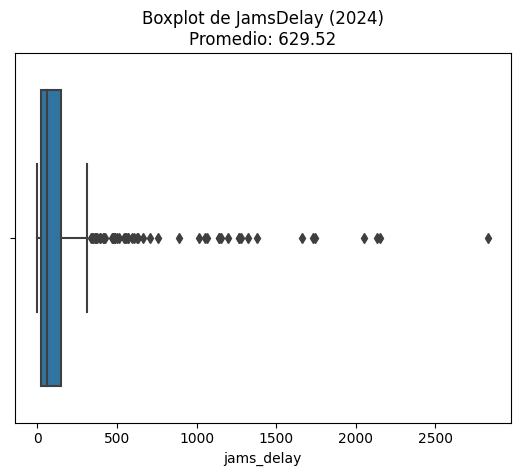

In [16]:
# Crear boxplot para observar el comportamiento de los minutos de congestion JamsDelay
sns.boxplot(x=traffic_2024_small['jams_delay'])

# obtener promedio para mostrarlo en título
mean_value = merged['jams_delay'].mean()
plt.title(f'Boxplot de JamsDelay (2024)\nPromedio: {mean_value:.2f}')
plt.show()


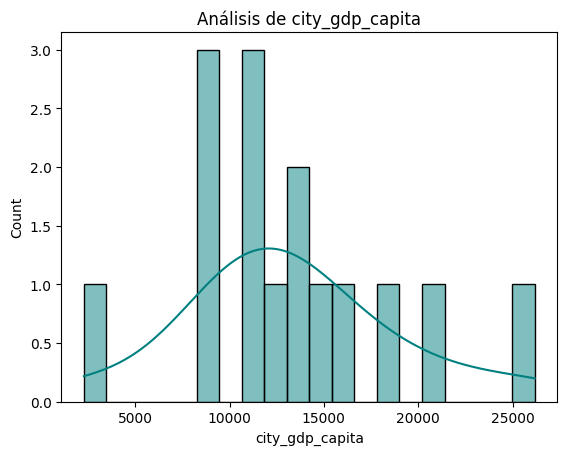

In [17]:
# Crear histograma para ver la distribución de la economía (city_gdp_capita)
sns.histplot(merged['city_gdp_capita'], bins=20, kde=True, color='teal')
plt.title('Análisis de city_gdp_capita')
plt.show()


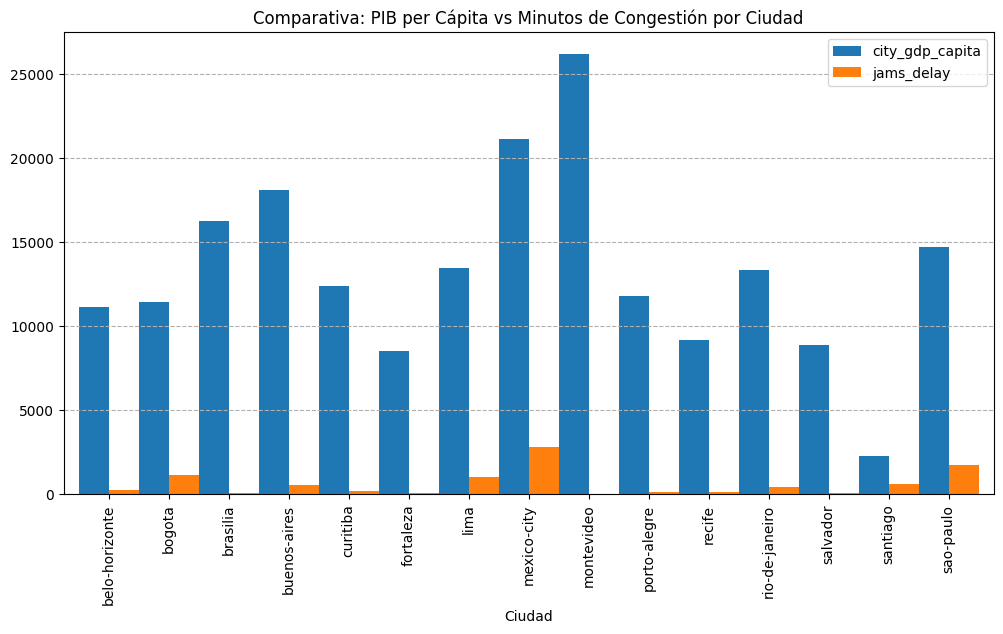

In [18]:
# Gráfico de barras para comparar jams_delay y city_gdp_capita por ciudad
#merged.plot( ... , y=['jams_delay', 'city_gdp_capita'])
merged_plot = merged.set_index('city')[['city_gdp_capita', 'jams_delay']]
ax = merged_plot.plot(kind='bar', figsize=(12, 6), width=1)

plt.title('Comparativa: PIB per Cápita vs Minutos de Congestión por Ciudad')
plt.xlabel('Ciudad')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=1)
plt.xticks(rotation=90)
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Se nota un buen manejo de visualización al usar distintos gráficos para explorar congestión y variables económicas, lo que ayuda a entender patrones y posibles relaciones. El boxplot y el histograma están bien planteados y el promedio en el título aporta contexto útil.


<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Como recomendación para la última gráfica, al mezclar variables con escalas tan distintas el mensaje puede volverse confuso, podrías usar gráficos separados o normalizar los valores. Otra opción sería configurar dos ejes Y distintos, lo cual permita presentar la información de manera más clara. Te comparto una página donde explican como hacer esta configuración: [Enlace](https://www.analyticslane.com/2022/08/04/uso-de-multiples-ejes-en-matplotlib/)

</div>
</div>

**Tip:** Antes del `plt.show()` agrega el código `plt.xticks(rotation=90)` para rotar las etiquetas del eje X en 90 grados.

### 🧠 **Reflexiona**
Excelente trabajo llegando a esta etapa del análisis. Antes de avanzar, revisa tus gráficos, tómate un momento para pensar:

* ¿Las ciudades con mayor PIB per cápita también presentan más congestión?

* ¿O sucede lo contrario, o no existe una relación clara?

Escribe tus comentarios: Por lo que veo no existe una relación tan clara. Porque sí, Ciudad de México por ejemplo tiene el segundo GDP más alto y la congestión más alta también, pero montevideo, es el #1 con el GDP más alto pero su congestión es considerablemente baja, de los 15 países que podemos apreciar ahí podemos decir que no está ni en el top 10 de congestión. 
De igual forma lo comprobamos ya que vemos que el promedio de GDP se conglomera entre 10,000 y 15,000, pero si analizamos los paises que están dentro de este rango de GDP, tienen congestiones muy variables, no hay un patrón visible. 


---

## 🧩Paso 7: Exportar y documentar resultados

En esta etapa final consolidarás todo tu trabajo: guardarás el dataset limpio y crearás un resumen que documente los resultados del proyecto.

### 7.1 Guardar dataset final

**🎯Objetivo:**
Generar un CSV limpio, reproducible y con columnas relevantes para análisis posterior.

**Instrucciones**

- Exporta el DataFrame `merged` con el nombre: `ladb_mobility_economy_2024_clean.csv`
- Usa `index=False` para no incluir el índice.


In [19]:
# Exporta el dataset final como CSV
merged.to_csv("ladb_mobility_economy_2024_clean.csv", index=False)

Para poder ver o descargar el archivo generado:   
En el menú lateral que esta a la izquierda, ve hasta la parte de abajo, a la sección de **Exportar dataset** para más información. 


---

## ✅ Entregables

1. **Notebook `.ipynb`** con todas las celdas (código + comentarios).
2. **CSV final**: `ladb_mobility_economy_2024_clean.csv`.
3. **Resumen ejecutivo breve** en Markdown (3–5 párrafos).



---

# 🧾 Resumen ejecutivo (plantilla)

> Completa este resumen al finalizar el análisis. Mantén 3–5 párrafos cortos, claros y accionables.

**Contexto & objetivo:**  
- Responde la pregunta central del análisis: ¿qué relación existe entre la movilidad urbana (congestión, tiempos de viaje) y la productividad económica (PIB per cápita)?
- Explica brevemente las variables clave utilizadas y su relevancia para la toma de decisiones.

**Cobertura de datos:**  
- Especifica los años analizados, número de ciudades y países incluidos.

**Metodología (alto nivel):**  
- Describe los procesos principales: limpieza de datos (formatos, estandarización de columnas).
- Explica la agregación por ciudad–año y el uso de una unión INNER para integrar tráfico y economía.
- Menciona las validaciones visuales empleadas (distribuciones, outliers, tendencias generales).

**Hallazgos iniciales:**  
- Resume los patrones más importantes entre índices de tráfico y PIB per cápita.
- Destaca anomalías u outliers que podrían requerir revisión adicional o un análisis más profundo.

**Recomendaciones**  
Aterriza los hallazgos en acciones: ciudades prioritarias, necesidad de validar fuentes, requerimiento de análisis adicionales, o propuestas de inversión.

- ¿Qué ciudad : Bogotá, Lima o Buenos Aires o alguna otra en particular, muestra la mayor correlación significativa entre altos niveles de congestión vehicular y bajos indicadores de productividad económica, sugiriendo ser una ciudad prioritaria para inversión en infraestructura de transporte?


# Resumen ejecutivo

En el ejercicio anterior, se revisaron datos del año 2024 para la cuestión de movilidad y GDP per cápita para así poder entender si hay una relación directa entre el crecimiento económico o el bajo crecimiento contra la saturación/embotellamientos urbanos.

El análisis se hizo con 15 ciudades diferentes de 7 paises dentro de latinoamerica, ya que auqnue el archivo de tráfico si contaba con información de más paises y ciudades, pero el archivo de GDP pero cápita con datos del 2024 contaba con información de solo estos 15 paises.
Las dos varibales principales que se utilizaron para hacer el comparartivo fueron:
jams_delay - Básicamente indica el tiempo de retraso promedio en mínutos que hay en esa ciudad.
city_gdp_capita - Que esto indica el GDP per cápida de cada una de las ciudades analizadas.

Para lograr lo anterior se realizó un inner join para poder tener en conjunto los datos de todas las ciudad que cumplieran específicamente con todos los datos requeridos. Fue al hacer esta unión que confirmamos que uno de los dos documentos con los que estabamos trabajandoo era mucho más peuqeño que el otro, por ende quedaron muchas ciudades y países fuera del análsis. 

Con las dos variables anteriormente mencionadas y haciendo uin gráfico de barras pudimos identificar que no necesariamente hay una relación directa positiva o negativa con la cantidada de embotellamientos y el crecimiento del GDP. Ya que un muy claro ejemplo son las dos primeras ciudad con los GDPs más altos Montevideo y Ciudad de México, ya que Montevideo es el que tiene el GDP más alta, pero de los que tiene retrasos por embotellamiento más bajo. Por otro lado, Ciudad de México es la segunda ciuidad con el GDP más alto, pero también es la primer ciudad con el promedio de retrasos por embotellamiento más alto. 
Más sin embargo la gráfica de "boxplot" si nos muestra que hay bastantes datos fuera del promedio y de lo que se considera le valor máximo, por lo que sería bueno revisar estos outliers y ver si son correctos.

POr último y para poder hacer un mejor análisis, recomiendo primero que nada robustecer el documento de la econonomía, para así poder tener los datos de más ciudades/paises y poder tener un comparativo más extenso.
En todo caso con estos datos si bien, ya se mencionó que no se puede sacar una relación directa entre el GDP y los embotellamientos, si se pudiera hacer una inversión tipo prueba para bien corroborar que no haya relación o desmentir la teoría y confirmar que a menor embotellamiento, mejor GDP. 
Para esto recomiendo a Bogotá y Ciudad de México como ciudades en donde se pudiera priorizar la inversión y con esto confirmar si ayuda o no. 
El motivo de elegir Ciudad de México es que es la ciudad no. 1 con más embotellamientos. Si se mejora este tema, y hay relación con el GDP deberíamos de ver un incremento considerable. Y a Bogotá lo recomiendo ya que está en la mitad de la tabla con respecto al GDP, pero es el no 3 con más embotellamientos. Si esto tiene correlación y se mejora, se debería de ver un crecimiento considerable y por ende ganar lugares en la tabla de GDP.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Inicias tu resumen mostrando una buena comprensión del objetivo del ejercicio y logras conectar de forma clara los datos de movilidad con el contexto económico, dejando ver que sabes integrar fuentes distintas y justificar por qué el análisis se limita a cierto grupo de ciudades. Tu interpretación de los gráficos va más allá de una lectura superficial y planteas con criterio que los patrones observados no apuntan a una relación simple entre las variables, además de reconocer la importancia de revisar valores atípicos antes de sacar conclusiones más firmes.

En algunos momentos, tu argumentación se acerca a conclusiones que podrían interpretarse como causales, cuando en realidad el análisis solo permite hablar de asociaciones; ahí sería útil ser más cuidadoso con el alcance de lo que los datos permiten afirmar. 

Para trabajos futuros, podrías explorar métricas complementarias o análisis estadísticos más formales y asegurar una mayor cobertura de datos económicos, lo que te ayudaría a reforzar o descartar hipótesis con mayor solidez.


</div>